<a href="https://colab.research.google.com/github/AbbasHussain72/Wavelet-featre-extraction-/blob/main/current_wavelet_Transform_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import h5py
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.widgets import SpanSelector
import glob
import os
import re

In [2]:
import matplotlib as mpl
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import font_manager as fm, pyplot as plt

!wget https://github.com/trishume/OpenTuringCompiler/blob/master/stdlib-sfml/fonts/Times%20New%20Roman.ttf
!wget https://github.com/matomo-org/travis-scripts/blob/master/fonts/Arial.ttf

font_files = fm.findSystemFonts()

# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
    fm.fontManager.addfont(font_file)

# Use your new font on all your plots.
plt.rc('font', family='serif ')


--2023-11-12 12:54:17--  https://github.com/trishume/OpenTuringCompiler/blob/master/stdlib-sfml/fonts/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5715 (5.6K) [text/plain]
Saving to: ‘Times New Roman.ttf’

Times New Roman.ttf 100%[===================>]   5.58K  --.-KB/s    in 0s      

2023-11-12 12:54:17 (55.3 MB/s) - ‘Times New Roman.ttf’ saved [5715/5715]

--2023-11-12 12:54:18--  https://github.com/matomo-org/travis-scripts/blob/master/fonts/Arial.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6624 (6.5K) [text/plain]
Saving to: ‘Arial.ttf’

Arial.ttf           100%[===================>]   6.47K  --.-KB/s    in 0s      

2023-11-12 12:54:18 (48.5 MB/s) - ‘Arial.ttf’ saved [6624/6624]



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read datafile and reset index
path = '/content/drive/MyDrive/goodbaddatanewbalanced.csv'
masterdata = pd.read_csv(path,sep='\t')
masterdata = masterdata.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df = masterdata

In [ ]:
#read wavelet names file
path = '/content/drive/MyDrive/wavelet_names.csv'
md = pd.read_csv(path,sep=',')
wavelets= md['Wavelets'].tolist()

# Data Analysis

In [ ]:
#To take interested data
# df = masterdata[(masterdata['Tool'] == 'OP01') | (masterdata['Tool'] == 'OP02')| (masterdata['Tool'] == 'OP04')| (masterdata['Tool'] == 'OP07')| (masterdata['Tool'] == 'OP10')]

In [ ]:
#Function for balancing the data according to condition, tool and machine
# def balance(df,con1,con2,con3):
#   v = []
#   v = df[(df['Tool'] == con1) & (df['Condition'] == con2)& (df['Machine'] == con3)].index
#   f = df[(df['Tool'] == 'OP02') & (df['Condition'] == 'bad') & (df['Machine'] == 'M01')].index


#   # h = df[(df['Tool'] == 'con1') & (df['Condition'] == 'con2')].shape
#   bb = abs(len(v)- len(f))
#   v = v[0:bb]
#   new = df.loc[df.index.drop(v)]

#   return new

In [ ]:
# df = balance(df,'OP02','good','M01')


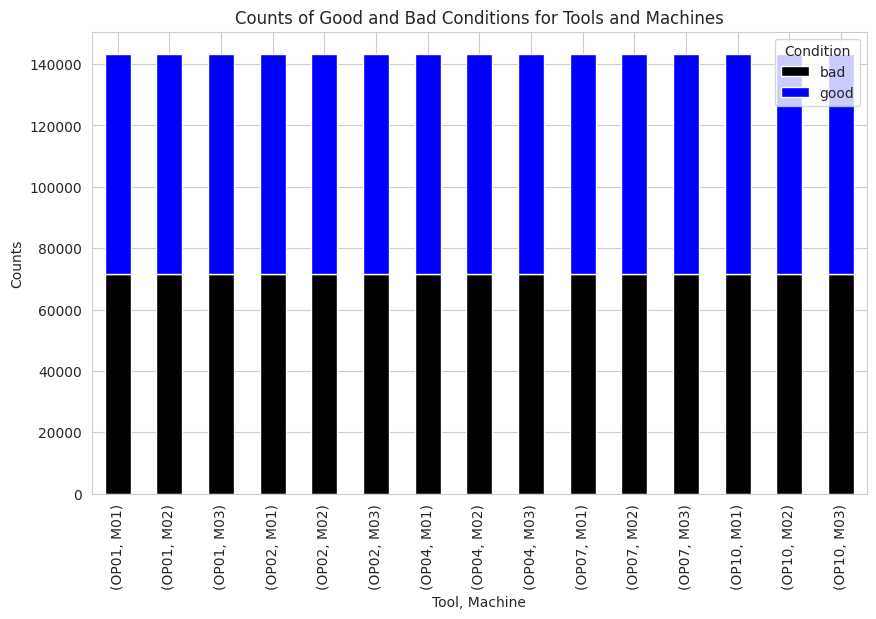

In [ ]:
# Grouped the data for bar plot
grouped = df.groupby(['Tool', 'Machine', 'Condition']).size().reset_index(name='counts')

# Pivot the data to create a stacked bar plot
pivot = grouped.pivot_table(index=['Tool', 'Machine'], columns='Condition', values='counts', aggfunc='sum', fill_value=0)

# Plot the stacked bar chart
colors = {'good': 'blue', 'bad': 'black'}
ax = pivot.plot.bar(stacked=True, color=[colors[c] for c in pivot.columns], figsize=(10, 6))

# Set the labels for the axes and the title
ax.set_xlabel('Tool, Machine')
ax.set_ylabel('Counts')
ax.set_title('Counts of Good and Bad Conditions for Tools and Machines')

# Show the plot
plt.show()


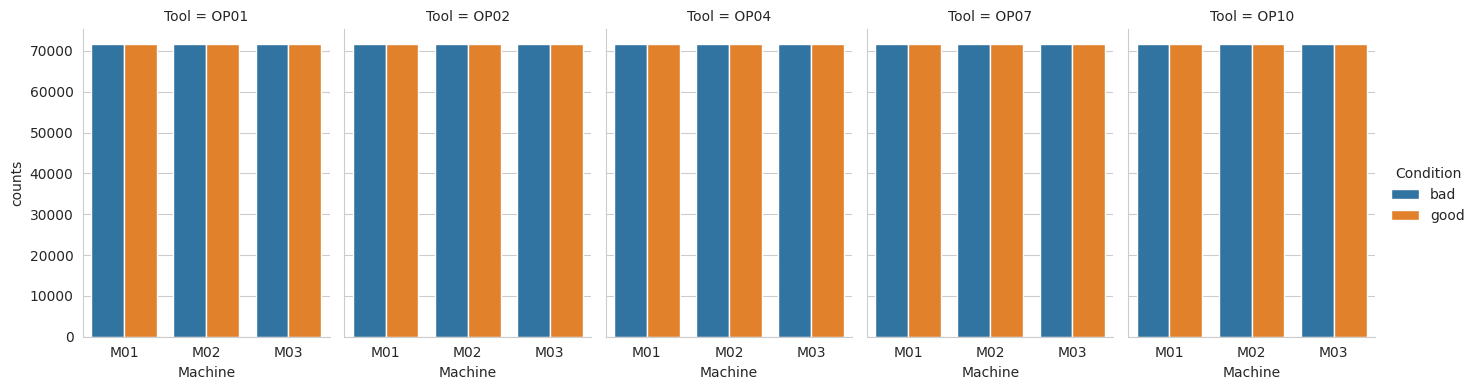

In [ ]:
import seaborn as sns
# Create a grouped bar chart
sns.catplot(x="Machine", y="counts", hue="Condition", col="Tool", data=grouped, kind="bar", height=4, aspect=.7)


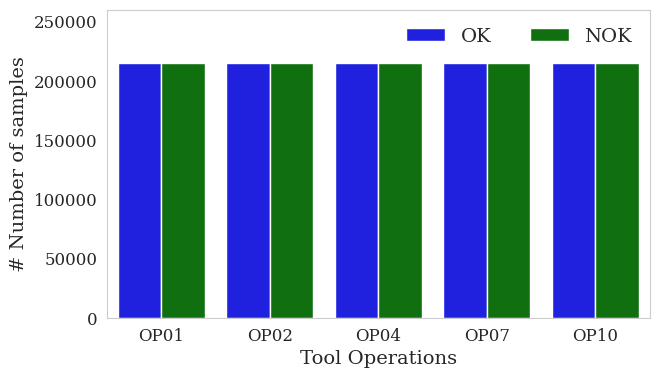

In [ ]:
#plotting the data
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
sns.set_style('whitegrid')
plt.figure(figsize = (7, 4),facecolor=(1, 1, 1))
# Use your new font on all your plots.
plt.rc('font', family='serif ')
#plot
sns.countplot(x = 'Tool',hue = 'Condition',data = df,palette=['blue', 'green'])
#plt.title('Number of samples', fontsize=16)
plt.xlabel('Tool Operations', fontsize=14)
plt.ylabel('# Number of samples', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)

# Set the limits of the x and y axes
#plt.xlim(left=-0.5, right=2.5)
plt.ylim(bottom=0, top=260000)

# Get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Modify the labels
labels[0] = 'OK'
labels[1] = 'NOK'
# labels[2] = 'M03'

# Create a new legend with the modified labels
plt.legend(handles, labels, fontsize = 14,ncol=3,edgecolor='None')


# plt.savefig('databar_machine.tiff', dpi=300, bbox_inches="tight")
# plt.close()
plt.show()


In [ ]:
#Plotting the time series data sample
ff = masterdata[(masterdata['Tool'] == 'OP01') & (masterdata['Machine'] == 'M01')& (masterdata['Condition'] == 'good') & (masterdata['Repeat'] == 4)]
ff = ff.reset_index(drop = True)
ff1 = masterdata[(masterdata['Tool'] == 'OP01') & (masterdata['Machine'] == 'M01')& (masterdata['Condition'] == 'bad') & (masterdata['Repeat'] == 0)]
ff1 = ff1.reset_index(drop = True)

In [ ]:
# subtracting the value to get zero starting value
ff.loc[:, 'Time (s)'] = ff['Time (s)'] - 4.9440
ff = ff.copy()
ff1.loc[:, 'Time (s)'] = ff1['Time (s)'] - 4.9440
ff1 = ff1.copy()

In [ ]:
# plt.rcParams['font.family']

['serif']

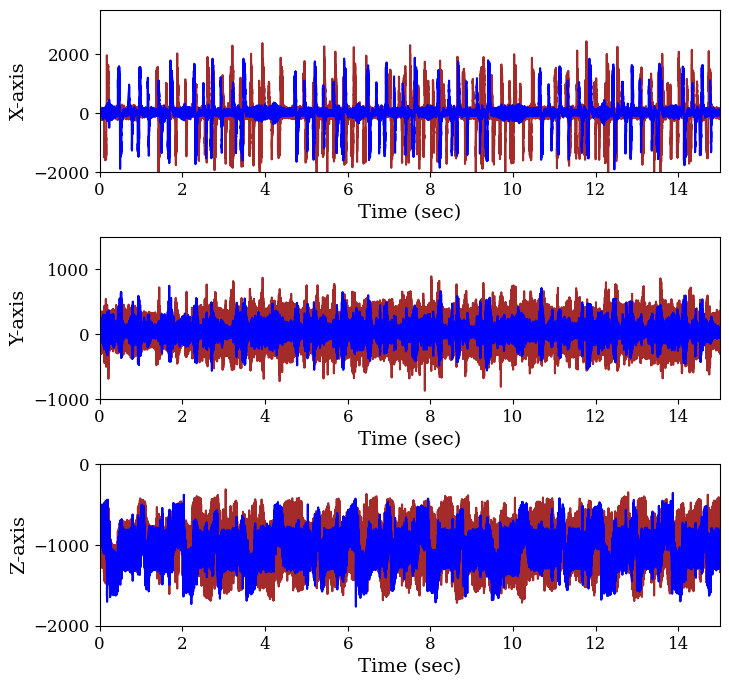

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# Create a figure with 3 subplots arranged vertically
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))
plt.rc('font', family='serif ')
# Plot data in each subplot
axs[0].plot(ff1['Time (s)'], ff1['X'],'brown')
axs[0].plot(ff['Time (s)'], ff['X'],'b')

axs[1].plot(ff1['Time (s)'], ff1['Y'],'brown')
axs[1].plot(ff['Time (s)'], ff['Y'],'b')

axs[2].plot(ff1['Time (s)'], ff1['Z'],'brown')
axs[2].plot(ff['Time (s)'], ff['Z'],'b')


# set the axis limit
axs[0].set_xlim(0,15)
axs[1].set_xlim(0,15)
axs[2].set_xlim(0,15)
axs[0].set_ylim(-2000,3500)
axs[1].set_ylim(-1000,1500)
axs[2].set_ylim(-2000,8)

# set label
axs[0].set_xlabel('Time (sec)', fontsize=14)
axs[0].set_ylabel('X-axis', fontsize=14)
axs[1].set_xlabel('Time (sec)', fontsize=14)
axs[1].set_ylabel('Y-axis', fontsize=14)
axs[2].set_xlabel('Time (sec)', fontsize=14)
axs[2].set_ylabel('Z-axis', fontsize=14)

# set font size of tick labels
axs[0].tick_params(axis='both', labelsize=12)
axs[1].tick_params(axis='both', labelsize=12)
axs[2].tick_params(axis='both', labelsize=12)

# remove grid lines from subplot
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)

# Set the overall title of the figure
#fig.suptitle('Three subplots', fontsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()

# Save the plot in TIFF format with a resolution of 300 pixels and transparent background
# plt.savefig('plotsample.tiff', dpi=300, format='tiff', transparent=True)

plt.clf()


In [ ]:
 plt.close()

In [ ]:
# df.to_csv('goodbaddatanewbalanced.csv', sep='\t') # relative position

# FFT of the signal for decomposition level selection

In [ ]:
#Plotting the time series data sample
# ff = masterdata[(masterdata['Tool'] == 'OP02') & (masterdata['Machine'] == 'M01')& (masterdata['Condition'] == 'good')]
ff = masterdata[(masterdata['Tool'] == 'OP02') & (masterdata['Machine'] == 'M01')& (masterdata['Condition'] == 'bad') & (masterdata['Repeat'] == 0)]
ff = ff.reset_index(drop = True)

In [ ]:
ff.Repeat.unique()

array([0])

In [ ]:
ff.head()

,Machine,Date,Tool,Condition,Repeat,Time (s),X,Y,Z
0,M01,Feb2019,OP02,bad,0,0.0000,27.0,103.0,-1116.0
1,M01,Feb2019,OP02,bad,0,0.0005,29.0,-304.0,-1134.0
2,M01,Feb2019,OP02,bad,0,0.0010,-91.0,-80.0,-964.0
3,M01,Feb2019,OP02,bad,0,0.0015,-97.0,234.0,-954.0
4,M01,Feb2019,OP02,bad,0,0.0020,-17.0,97.0,-1030.0


In [ ]:
from scipy.fftpack import fft, ifft
def extract_fft_peak_frequency(data, sampling_rate):
    fft_data = np.fft.fft(data)
    N = len(fft_data)
    n = np.arange(N)
    T = N/sampling_rate
    freq = n/T
    freqs = np.fft.fftfreq(len(data))

    peak_coefficient = np.argmax(np.abs(fft_data))
    peak_freq = freqs[peak_coefficient]
    peak_ampl = fft_data[peak_coefficient]
    a = abs(peak_freq * sampling_rate)
    b= abs(peak_ampl)



    # all_coefficient = (np.abs(fft_data) > 1000)
    # all_freq = freqs[all_coefficient]
    # all_ampl = fft_data[all_coefficient]

    # c = abs(all_freq * sampling_rate)
#     c = list(np.unique(c))

    # d = abs(all_ampl)
#     d = list(np.unique(d))

#     for i in range(1, (abs (len(a_amp) - len(a_fre)))+1):
#         del d[-i]

    return [a,b,N,freq,fft_data,T]


In [ ]:
#Signal FFT
from scipy import signal

sr = 2000
x = ff['X'].values
[p_fre,p_amp,N,freq,XX,T]= extract_fft_peak_frequency(x, sr)
# rms_ori = np.sqrt(np.mean(x**2))

# for raw data Get the one-sided specturm -->
n_oneside = N//2
# get the one side frequency -->
f_oneside = freq[:n_oneside]


# sos = signal.butter(2, p_fre, 'hp', fs=sr, output='sos')
# filtered = signal.sosfilt(sos, x)
# rms_filt = np.sqrt(np.mean(filtered**2))
# [f_p_fre,f_p_amp,f_a_fre,f_a_amp,f_N,f_freq,f_X]= extract_fft_peak_frequency(filtered, sr)

# print(p_fre)
# print(p_amp)

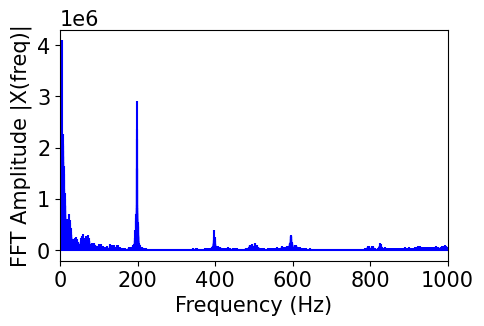

In [ ]:
#Ploting
fig = plt.figure(figsize=(5,3),facecolor=(1, 1, 1))
plt.rcParams.update({'font.size':15})
plt.rc('axes', labelsize=15)
plt.stem(f_oneside, np.abs(XX[:n_oneside]), 'b',markerfmt=" ", basefmt="b")
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0,1000)
# plt.xlim(10,1000)
plt.grid(False)
plt.show()


#ax.legend(loc=1)
# fig.savefig('fft.png', dpi=300, bbox_inches="tight")

# Feature Extraction using Wavelet Packet Analysis

In [ ]:
df['Repeat'] = df['Repeat'].astype(str)
df['newcol'] = df['Machine'] +  df['Date'] + df['Tool'] + df['Condition'] + df['Repeat']
df = df.reset_index(drop = True)

In [ ]:
#df['Resultant'] = np.sqrt(df['X']**2 + df['Y']**2 + df['Z']**2)

In [ ]:
df.head()

,Machine,Date,Tool,Condition,Repeat,Time (s),X,Y,Z,newcol
0,M01,Aug2019,OP01,bad,0,7.1765,296.0,-111.0,-761.0,M01Aug2019OP01bad0
1,M01,Aug2019,OP01,bad,0,7.1770,58.0,353.0,-704.0,M01Aug2019OP01bad0
2,M01,Aug2019,OP01,bad,0,7.1775,142.0,402.0,-917.0,M01Aug2019OP01bad0
3,M01,Aug2019,OP01,bad,0,7.1780,27.0,253.0,-1171.0,M01Aug2019OP01bad0
4,M01,Aug2019,OP01,bad,0,7.1785,68.0,46.0,-1255.0,M01Aug2019OP01bad0


##  Number of segment for each file

In [ ]:
sum1=[]
window_size = 2000
step_size = 1000
for i in df['newcol'].unique():
    print (i)
    master_data =df[(df['newcol'] == i)]
    v = 0
    for j in range(0, master_data.shape[0] - window_size, step_size):
        v = v+1
    print(v)
        #num_segments = np.floor(len(master_data )/1000)
    sum1.append(v)
    #print(num_segments)
print(np.sum(sum1))

In [ ]:
# def compute_shannon_entropy(signal):
#     return -np.nansum(signal**2 * np.log(signal**2)) # nansum to exclude pesky terms like "0*np.log(0)"

In [ ]:
# Function to find the entropy of the signal

from scipy.stats import entropy
from math import log, e
import pandas as pd


def entropy2(labels, base=None):
  """ Computes entropy of label distribution. """

  n_labels = len(labels)

  if n_labels <= 1:
    return 0

  value,counts = np.unique(labels, return_counts=True)
  probs = counts / n_labels
  n_classes = np.count_nonzero(probs)

  if n_classes <= 1:
    return 0

  ent = 0.

  # Compute entropy
  base = e if base is None else base
  for i in probs:
    ent -= i * log(i, base)

  return ent

## Wavelet Feature Extraction

In [ ]:
#This will create the data list according to 'newcol'
import pywt
# w = pywt.Wavelet ('dmey')
level = 2  #3

#wavelet_feature_test = pd.DataFrame()
data = df
window_size = 2000
step_size = 1000

In [ ]:
data.shape

(2151330, 10)

In [ ]:
b = ['M01Aug2019OP01bad0',
'M01Feb2019OP01bad0']
for i in b:
    print(i)

M01Aug2019OP01bad0
M01Feb2019OP01bad0


In [ ]:
#trying new method for fast computation
import time
# print(w)

all_wavelet = pd.DataFrame()

for w in wavelets:
    start_time = time.time()
    wavelet_feature_all = pd.DataFrame()
    print(f"Running for {w}")

    for i in data['newcol'].unique():
        master_data = data[(data['newcol'] == i)]
        wavelet_feature_j = pd.DataFrame()

        for j in range(0, master_data.shape[0] - window_size, step_size):
            wavelet_feature = pd.DataFrame()
            df1 = pd.DataFrame()
            df1['X'] = master_data['X'].values[j: j + window_size]
            df1['Y'] = master_data['Y'].values[j: j + window_size]
            df1['Z'] = master_data['Z'].values[j: j + window_size]

            colvalue = ['X', 'Y', 'Z']
            wavelet_feature['Date'] = [max(master_data['Date'].values[j: j + window_size])]
            wavelet_feature['Machine'] = [max(master_data['Machine'].values[j: j + window_size])]
            wavelet_feature['Operation'] = [max(master_data['Tool'].values[j: j + window_size])]
            wavelet_feature['Condition'] = [max(master_data['Condition'].values[j: j + window_size])]
            wavelet_feature['Repeat'] = [max(master_data['Repeat'].values[j: j + window_size])]
            wavelet_feature['operationcondition'] = wavelet_feature['Operation'] + wavelet_feature['Condition']

            for val in colvalue:
                data_wave = df1[val].values
                wp = pywt.WaveletPacket(data_wave, w, maxlevel=level)  # Wavelet packet transformation
                packet_names = [node.path for node in wp.get_level(level, "freq")]
                for v in range(len(packet_names)):
                    new_wp = pywt.WaveletPacket(data=None, wavelet=w, maxlevel=level)
                    new_wp[packet_names[v]] = wp[packet_names[v]].data
                    reconstructed_signal = new_wp.reconstruct(update=False)  # Signal reconstruction from wavelet packet coefficients

                    # Wavelet feature
                    wavelet_feature = pd.concat([wavelet_feature,pd.DataFrame({'mean'+val+str(v): [np.mean(reconstructed_signal)],
                                                          'std'+val+str(v): [np.std(reconstructed_signal)],
                                                          'max'+val+str(v): [max(reconstructed_signal)],
                                                          'min'+val+str(v): [min(reconstructed_signal)],
                                                          'entropy'+val+str(v): [entropy2(reconstructed_signal, 2)],
                                                          'skew'+val+str(v): [stats.skew(reconstructed_signal)],
                                                          'kurt'+val+str(v): [stats.kurtosis(reconstructed_signal)]})], axis=1)


            wavelet_feature_j = pd.concat([wavelet_feature_j, wavelet_feature], ignore_index=True)

        wavelet_feature_all = pd.concat([wavelet_feature_all, wavelet_feature_j], ignore_index=True)
        wavelet_feature_all['wavelet'] = w

    end_time = time.time()
    print(f'Time taken for  {w}: {end_time-start_time:.6f}')

    all_wavelet = pd.concat([all_wavelet, wavelet_feature_all], ignore_index=True)


all_wavelet.to_csv('/content/drive/MyDrive/50L2_wfeature.csv', sep='\t') # relative position

In [ ]:
all_wavelet.to_csv('/content/drive/MyDrive/All_wavelet_feature.csv', sep='\t') # relative position

In [ ]:
all_wavelet['operationcondition'].value_counts()

OP02bad     1680
OP04bad     1680
OP10bad     1680
OP01good    1656
OP02good    1656
OP04good    1656
OP07good    1656
OP10good    1656
OP01bad     1648
OP07bad     1648
Name: operationcondition, dtype: int64

# Load the file with all wavelet feature

In [ ]:
#read csv to append the data and reset index
path1 = '/content/drive/MyDrive/50L3_wfeature.csv'
path2 = '/content/drive/MyDrive/50L2_wfeature.csv'

df1 = pd.read_csv(path1,sep='\t')
df1 = df1.drop(['Unnamed: 0'], axis = 1)
df2 = pd.read_csv(path2,sep='\t')
df2 = df2.drop(['Unnamed: 0'], axis = 1)



In [ ]:
df2.shape, df1.shape

((103850, 91), (103850, 175))

In [ ]:
df = df2  #level 3 decomposition

# comparison of models using confusion matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import time

In [ ]:
#Training for confusion matrix image
#coif8  RF SVC
#db13 MLP
new = df[df['wavelet'] == 'db13']
X = new.drop(['Date', 'Machine', 'Operation', 'Condition', 'Repeat', 'operationcondition', 'wavelet'], axis=1)
y = new['operationcondition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#feature selection using RF
f_selection = RandomForestClassifier(random_state = 42, verbose=0)
feature_selector = SelectFromModel(f_selection)
feature_selector.fit(X_train, y_train)
X_train_transformed = feature_selector.transform(X_train)
X_test_transformed = feature_selector.transform(X_test)

In [ ]:
start_time = time.time()
#RF MODEL
# model = RandomForestClassifier(max_depth = 15,max_features = 'log2',min_samples_leaf = 1,min_samples_split = 2,n_estimators = 150, random_state = 42, verbose=0)
# model.fit(X_train_transformed, y_train)

#SVC MODEL
# model = Pipeline([('scaler', StandardScaler()), ('classification', SVC(C = 7,gamma = 0.0209, kernel = 'rbf'))])
# model.fit(X_train_transformed, y_train)

#MLP MODEL
model = Pipeline([('scaler', StandardScaler()), ('classification', MLPClassifier(alpha = 0.01,hidden_layer_sizes = (100,),max_iter = 350))])
model.fit(X_train_transformed, y_train)

#PREDICTION
y_test_pred = model.predict(X_test_transformed)
end_time = time.time()
f1_test = f1_score(y_test, y_test_pred,average='macro')
print(f1_test*100)
print(end_time-start_time)


93.82894399492342
8.232847213745117


In [ ]:
from sklearn.metrics import confusion_matrix
test_confu_matrix = confusion_matrix(y_test,  y_test_pred)
report = classification_report(y_test,  y_test_pred)
# print(report)
lines = report.split('\n')   # Split the report into lines
labels = [line.split()[0] for line in lines[2:12]]   # Extract the labels from each line

# Print the extracted labels
# print(labels)

In [ ]:
print(report)

              precision    recall  f1-score   support

     OP01bad       0.98      0.97      0.98        64
    OP01good       0.91      0.91      0.91        53
     OP02bad       0.98      1.00      0.99        65
    OP02good       0.97      0.98      0.98        64
     OP04bad       0.93      0.93      0.93        60
    OP04good       0.86      0.90      0.88        49
     OP07bad       0.97      0.95      0.96        76
    OP07good       0.92      0.94      0.93        65
     OP10bad       0.92      0.92      0.92        60
    OP10good       0.92      0.90      0.91        68

    accuracy                           0.94       624
   macro avg       0.94      0.94      0.94       624
weighted avg       0.94      0.94      0.94       624



In [ ]:
dd = pd.DataFrame([row.split() for row in report.split('\n')[2:-5]])

In [ ]:
dd

,0,1,2,3,4
0,OP01bad,0.98,0.97,0.98,64
1,OP01good,0.91,0.91,0.91,53
2,OP02bad,0.98,1.00,0.99,65
3,OP02good,0.97,0.98,0.98,64
4,OP04bad,0.93,0.93,0.93,60
5,OP04good,0.86,0.90,0.88,49
6,OP07bad,0.97,0.95,0.96,76
7,OP07good,0.92,0.94,0.93,65
8,OP10bad,0.92,0.92,0.92,60
9,OP10good,0.92,0.90,0.91,68


In [ ]:
# import numpy as np
# from sklearn.metrics import confusion_matrix

# # Assuming you have the actual labels y_true and predicted labels y_pred
# confusion_mat = confusion_matrix(y_true, y_pred)

# Calculating TP, TN, FP, FN for each class
num_classes = test_confu_matrix.shape[0]
TP = np.zeros(num_classes)
TN = np.zeros(num_classes)
FP = np.zeros(num_classes)
FN = np.zeros(num_classes)
SP = np.zeros(num_classes)
P = np.zeros(num_classes)
R = np.zeros(num_classes)
ACC = np.zeros(num_classes)
for i in range(num_classes):
    TP[i] = test_confu_matrix[i, i]
    FN[i] = test_confu_matrix[i, :].sum() - TP[i]
    FP[i] = test_confu_matrix[:, i].sum() - TP[i]
    TN[i] = test_confu_matrix.sum() - (TP[i] + FP[i] + FN[i])
    SP[i] = TN[i]/(TN[i]+FP[i])
    P[i] = TP[i]/(TP[i]+FP[i])
    R[i] = TP[i]/(TP[i]+FN[i])
    ACC[i] = (TP[i]+TN[i])/(TP[i]+FN[i]+FP[i]+TN[i])
# Printing the values for each class
for i in range(num_classes):
    print("Class:", i)
    print("True Positives (TP):", TP[i])
    print("True Negatives (TN):", TN[i])
    print("False Positives (FP):", FP[i])
    print("False Negatives (FN):", FN[i])
    print("Specificity (SP):", SP[i])
    print("Precision (P):", P[i])
    print("Recall (P):", R[i])
    print("ACC (ACC):", ACC[i])
    print()


Class: 0
True Positives (TP): 62.0
True Negatives (TN): 559.0
False Positives (FP): 1.0
False Negatives (FN): 2.0
Specificity (SP): 0.9982142857142857
Precision (P): 0.9841269841269841
Recall (P): 0.96875
ACC (ACC): 0.9951923076923077

Class: 1
True Positives (TP): 48.0
True Negatives (TN): 566.0
False Positives (FP): 5.0
False Negatives (FN): 5.0
Specificity (SP): 0.9912434325744308
Precision (P): 0.9056603773584906
Recall (P): 0.9056603773584906
ACC (ACC): 0.9839743589743589

Class: 2
True Positives (TP): 65.0
True Negatives (TN): 558.0
False Positives (FP): 1.0
False Negatives (FN): 0.0
Specificity (SP): 0.998211091234347
Precision (P): 0.9848484848484849
Recall (P): 1.0
ACC (ACC): 0.9983974358974359

Class: 3
True Positives (TP): 63.0
True Negatives (TN): 558.0
False Positives (FP): 2.0
False Negatives (FN): 1.0
Specificity (SP): 0.9964285714285714
Precision (P): 0.9692307692307692
Recall (P): 0.984375
ACC (ACC): 0.9951923076923077

Class: 4
True Positives (TP): 56.0
True Negatives

In [ ]:
print(labels)

['OP01bad', 'OP01good', 'OP02bad', 'OP02good', 'OP04bad', 'OP04good', 'OP07bad', 'OP07good', 'OP10bad', 'OP10good']


# CONFUSION MATRIX

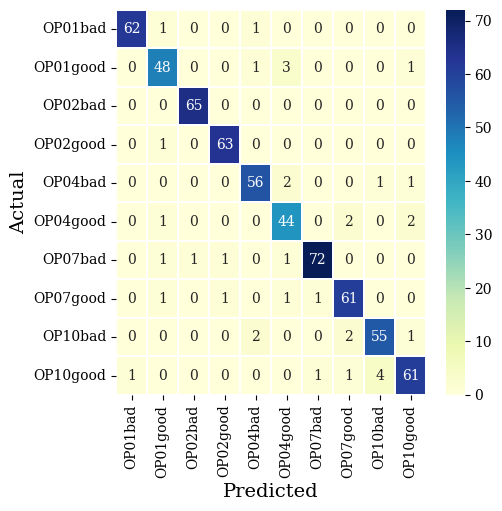

In [ ]:
# Use your new font on all your plots.
plt.rc('font', family='serif ')
# confusion matrix
import seaborn as sns
plt.figure(2,figsize=(5,5))
sns.heatmap(test_confu_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
# plt.title('Confusion matrix', fontsize = 15)
plt.ylabel('Actual',fontsize=14)
plt.xlabel('Predicted',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()





```
# This is formatted as code
```

# Feature selection_RF and Model_RF

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
import time

In [ ]:
#To find the validation score for grid search
param_grid = {
    'max_features': ['log2'],
    'n_estimators':  [200],
    'max_depth':  [15],
    'min_samples_leaf':  [1],
    'min_samples_split':  [2]}

# Subset the data for the current wavelet
new = df[df['wavelet'] == 'coif8']
print (new.shape)
X = new.drop(['Date', 'Machine', 'Operation', 'Condition', 'Repeat', 'operationcondition', 'wavelet'], axis=1)
y = new['operationcondition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Create for feature selection
f_selection = RandomForestClassifier(random_state = 42, verbose=0)


# Perform feature selection using SelectFromModel
feature_selector = SelectFromModel(f_selection)
feature_selector.fit(X_train, y_train)
X_train_transformed = feature_selector.transform(X_train)


# Create a GridSearchCV object for random forest
grid_search = GridSearchCV(f_selection, param_grid, cv=5, n_jobs=-1, verbose=0,
                          scoring='f1_macro', return_train_score=True)
# Fit the GridSearchCV object on the transformed training data
grid_search.fit(X_train_transformed, y_train)

validation_scores = grid_search.cv_results_['mean_test_score']
best_validation_accuracy = grid_search.best_score_
std_scores = grid_search.cv_results_['std_test_score']

print(validation_scores)
print(std_scores)
print(best_validation_accuracy)


(2077, 91)


[0.92387981]
[0.00997589]
0.9238798112147298


In [ ]:
rf_l2 = []
best_params = {}
#Define the parameter grid for RF
param_grid = {
    'max_features': ['sqrt', 'log2'],
    'n_estimators': range(50, 250, 50),
    'max_depth': range(5,30,5),
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5]}

# loop over each wavelet
# for w in wavelets :
  start_time = time.time()
  # Subset the data for the current wavelet
  new = df[df['wavelet'] == w]
  print (new.shape)
  X = new.drop(['Date', 'Machine', 'Operation', 'Condition', 'Repeat', 'operationcondition', 'wavelet'], axis=1)
  y = new['operationcondition']
  print (w)

  # Split the data into training, validation, and test sets
  # X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  # X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # # Create for feature selection
  f_selection = RandomForestClassifier(random_state = 42, verbose=0)
  # f_selection.fit(X_train, y_train)
  # y_test_pred = f_selection.predict(X_test)
  # f1_test = f1_score(y_test, y_test_pred,average='macro')
  # rf_l2.append(f1_test)

  # Perform feature selection using SelectFromModel
  feature_selector = SelectFromModel(f_selection)
  feature_selector.fit(X_train, y_train)
  X_train_transformed = feature_selector.transform(X_train)
  # X_val_transformed = feature_selector.transform(X_val)
  X_test_transformed = feature_selector.transform(X_test)

  print (X_train_transformed.shape)


  # Create a GridSearchCV object for random forest
  grid_search = GridSearchCV(f_selection, param_grid, cv=5, n_jobs=-1, verbose=0,
                            scoring='f1_macro', return_train_score=True)
  # Fit the GridSearchCV object on the transformed training data
  grid_search.fit(X_train_transformed, y_train)


  # Print the best hyperparameters
  # print(f'Best hyperparameters for {w}: {grid_search.best_params_}')

  # Evaluate the pipeline on the validation set
  # y_val_pred = grid_search.predict(X_val_transformed)
  # f1_val = f1_score(y_val, y_val_pred, average='macro')
  # print(f'F1 score on validation set for {w}: {f1_val}')

  # Evaluate the pipeline on the test set
  y_test_pred = grid_search.predict(X_test_transformed)
  f1_test = f1_score(y_test, y_test_pred,average='macro')
  print(f'F1 score on test set for {w}: {f1_test}')

  end_time = time.time()
  print(f'Time taken for  {w}: {end_time-start_time:.6f}')

  # rf_v.append(f1_val)
  rf_l2.append(f1_test)

  best_params[w] = grid_search.best_params_



In [ ]:
f1 = pd.DataFrame({'wavelet':wavelets, 'L2RF_F_T':rf_l2 })
f1.to_csv('/content/drive/MyDrive/l2f1score_new.csv', sep='\t') # relative position

In [ ]:
# create a dataframe from the dictionary of best parameters
df_best = pd.DataFrame.from_dict(best_params, orient='index')
df_best.to_csv('/content/drive/MyDrive/l2bestpara_new.csv', sep='\t') # relative position
# # concatenate the two DataFrames
# df_best = pd.concat([df_best, df_rf], axis=1)

In [ ]:
df_best

# Feature selection_RF and Model_SVC

In [ ]:
# HYPARAMETER TUNING OF SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import f1_score
svc_l2 = []

best_params = {}
# svc_param_grid = {'classification__C': range(1,10,1),
#               'classification__gamma': np.arange(0.001,0.2,0.00995),
#               'classification__kernel': ['linear', 'rbf']}

svc_param_grid = {'classification__C': [7],
              'classification__gamma': [0.0209],
              'classification__kernel': ['rbf']}

# loop over each wavelet
# for w in wavelets:
#   start_time = time.time()
# Subset the data for the current wavelet
new = df[df['wavelet'] == 'db13']
print (new.shape)
X = new.drop(['Date', 'Machine', 'Operation', 'Condition', 'Repeat', 'operationcondition', 'wavelet'], axis=1)
y = new['operationcondition']
# print (w)

# Split the data into training, validation, and test sets
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# #without feature selection
# pipe = Pipeline([('scaler', StandardScaler()), ('classification', SVC())])
# pipe.fit(X_train, y_train)
# y_test_pred = pipe.predict(X_test)
# f1_test = f1_score(y_test, y_test_pred,average='macro')
# svc_l2.append(f1_test)

# Create for feature selection
f_selection = RandomForestClassifier(random_state = 42, verbose=0)

# Perform feature selection using SelectFromModel
feature_selector = SelectFromModel(f_selection)
feature_selector.fit(X_train, y_train)
X_train_transformed = feature_selector.transform(X_train)
# X_val_transformed = feature_selector.transform(X_val)
# X_test_transformed = feature_selector.transform(X_test)

# print (X_train_transformed.shape)

# creating pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('classification', SVC())])

# Create a GridSearchCV object for random forest
grid_search = GridSearchCV(pipe, svc_param_grid, cv=5, n_jobs=-1, verbose=0,
                          scoring='f1_macro', return_train_score=True)
# Fit the GridSearchCV object on the transformed training data
grid_search.fit(X_train_transformed, y_train)

validation_scores = grid_search.cv_results_['mean_test_score']
best_validation_accuracy = grid_search.best_score_
std_scores = grid_search.cv_results_['std_test_score']

print(validation_scores)
print(std_scores)
print(best_validation_accuracy)

# Print the best hyperparameters
# print(f'Best hyperparameters for {w}: {grid_search.best_params_}')

# end_time = time.time()
# print(f'Time taken for  {w}: {end_time-start_time:.6f}')


# # Evaluate the pipeline on the test set
# y_test_pred = grid_search.predict(X_test_transformed)
# f1_test = f1_score(y_test, y_test_pred,average='macro')
# # accuracy = accuracy_score(y_test, y_test_pred)
# print(f'F1 score on test set for {w}: {f1_test}')

# svc_l2.append(f1_test)
# # svc_ac.append(accuracy)
# # store the best parameters for this wavelet in the dictionary
# best_params[w] = grid_search.best_params_
# # svc_v.append(f1_val)



(2077, 175)
[0.94802906]
[0.00334215]
0.94802905717301


In [ ]:
# create a dataframe from the dictionary of best parameters
df_bestsvc = pd.DataFrame.from_dict(best_params, orient='index')
df_bestsvc.to_csv('/content/drive/MyDrive/svcl2bestpara.csv', sep='\t') # relative position
f1svc = pd.DataFrame({'L2SVC_F_T':svc_l2 })
f1svc.to_csv('/content/drive/MyDrive/svcl2f1.csv', sep='\t') # relative position

# Feature selection RF and Model_MLP

In [ ]:
# HYPARAMETER TUNING OF MLP
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import time

# mlp_l2 = []
# MLP_best_params = {}

# mlp_param_grid = {'classification__alpha': [0.0001, 0.001, 0.01],
#     'classification__hidden_layer_sizes': [(50,), (50,50), (50,50,50), (50,50,50,50), (100,), (100,100), (100,100,100), (100,100,100,100)],
#     'classification__max_iter': [200, 350, 500]}
#'classification__activation': ['relu'],

mlp_param_grid = {'classification__alpha': [ 0.01],
    'classification__hidden_layer_sizes': [ (100,)],
    'classification__max_iter': [350]}

# loop over each wavelet
# for w in wavelets:
#   start_time = time.time()
  # Subset the data for the current wavelet
new = df[df['wavelet'] == 'db13']
# print (new.shape)
X = new.drop(['Date', 'Machine', 'Operation', 'Condition', 'Repeat', 'operationcondition', 'wavelet'], axis=1)
y = new['operationcondition']
# print (w)

# Split the data into training, validation, and test sets
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# #Without feature selection
# pipe = Pipeline([('scaler', StandardScaler()), ('classification', MLPClassifier(max_iter=500))])
# pipe.fit(X_train, y_train)
# y_test_pred = pipe.predict(X_test)
# f1_test = f1_score(y_test, y_test_pred,average='macro')
# mlp_l3.append(f1_test)

# Create for feature selection
f_selection = RandomForestClassifier(random_state = 42, verbose=0)

# Perform feature selection using SelectFromModel
feature_selector = SelectFromModel(f_selection)
feature_selector.fit(X_train, y_train)
X_train_transformed = feature_selector.transform(X_train)
# X_val_transformed = feature_selector.transform(X_val)
# X_test_transformed = feature_selector.transform(X_test)

# print (X_train_transformed.shape)

# creating pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('classification', MLPClassifier())])

# Create a GridSearchCV object for random forest
grid_search = GridSearchCV(pipe, mlp_param_grid, cv=5, n_jobs=-1, verbose=0,
                          scoring='f1_macro', return_train_score=True)
# Fit the GridSearchCV object on the transformed training data
grid_search.fit(X_train_transformed, y_train)

validation_scores = grid_search.cv_results_['mean_test_score']
best_validation_accuracy = grid_search.best_score_
std_scores = grid_search.cv_results_['std_test_score']

print(validation_scores)
print(std_scores)
print(best_validation_accuracy)

# Print the best hyperparameters
# print(f'Best hyperparameters for {w}: {grid_search.best_params_}')

# Evaluate the pipeline on the validation set
# y_val_pred = grid_search.predict(X_val_transformed)
# f1_val = f1_score(y_val, y_val_pred, average='macro')
# print(f'F1 score on validation set for {w}: {f1_val}')


# # Evaluate the pipeline on the test set
# y_test_pred = grid_search.predict(X_test_transformed)
# f1_test = f1_score(y_test, y_test_pred,average='macro')
# # accuracy = accuracy_score(y_test, y_test_pred)
# print(f1_test)
# # store the best parameters for this wavelet in the dictionary
# MLP_best_params[w] = grid_search.best_params_


# mlp_l2.append(f1_test)
# # mlp_ac.append(accuracy)
# end_time = time.time()
# print(f'Time taken for  {w}: {end_time-start_time:.6f}')

# # create a dataframe from the dictionary of best parameters
# df_bestmlp = pd.DataFrame.from_dict(MLP_best_params, orient='index')
# df_bestmlp.to_csv('/content/drive/MyDrive/mlpl2bestpara.csv', sep='\t') # relative position
# f1mlp = pd.DataFrame({'L2MLP_F_T':mlp_l2 })
# f1mlp.to_csv('/content/drive/MyDrive/mlpl2f1.csv', sep='\t') # relative position

[0.90128791]
[0.02425343]
0.9012879107412364


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
path1 = '/content/drive/MyDrive/l2bestpara_new.csv'
df1 = pd.read_csv(path1,sep='\t')
df1 = df1.drop(['Unnamed: 0'], axis = 1)

df2 = pd.read_csv('/content/drive/MyDrive/l2f1score_new.csv',sep = '\t')
df2 = df2.drop(['Unnamed: 0'], axis = 1)

# Ploting f1_score

In [45]:
path1 = '/content/drive/MyDrive/l2l3modelf1score_new.csv'
df1 = pd.read_csv(path1,sep=',')
df1 = df1.drop(['Unnamed: 0'], axis = 1)

In [5]:
df1.describe()

,L2RF_F_T,L2SVC_F_T,L2MLP_F_T,L2GBM_F_T,L2CNN_F_T,L3RF_F_T,L3SVC_F_T,L3MLP_F_T,L3GBM_F_T,L3CNN_F_T
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.900295,0.903460,0.886386,0.89004,0.835780,0.939490,0.937536,0.928406,0.928680,0.903200
std,0.010465,0.007587,0.010796,0.01160,0.016926,0.007816,0.007438,0.007731,0.009966,0.016176
min,0.855294,0.886198,0.835183,0.85400,0.795000,0.904279,0.922987,0.914495,0.898000,0.850000
25%,0.895370,0.898181,0.880671,0.88500,0.826250,0.936239,0.932112,0.922737,0.922000,0.900000
50%,0.902044,0.903969,0.886602,0.88900,0.835000,0.941678,0.940230,0.927626,0.931000,0.910000
75%,0.907324,0.908419,0.891488,0.90000,0.844750,0.943437,0.942647,0.934099,0.936000,0.910000
max,0.917034,0.920448,0.915127,0.90700,0.889000,0.953348,0.954445,0.945394,0.945000,0.937000


In [46]:
df1

,L2RF_F_T,L2SVC_F_T,L2MLP_F_T,L2GBM_F_T,L2CNN_F_T,L3RF_F_T,L3SVC_F_T,L3MLP_F_T,L3GBM_F_T,L3CNN_F_T,wavelet
0,0.900215,0.908316,0.888111,0.888,0.819,0.937943,0.924432,0.917269,0.922,0.900,db2
1,0.890681,0.901593,0.878704,0.884,0.845,0.938828,0.926585,0.915831,0.917,0.871,db3
2,0.907904,0.896668,0.899804,0.887,0.814,0.935895,0.931922,0.923414,0.941,0.920,db4
3,0.895111,0.904956,0.887439,0.877,0.808,0.934928,0.939828,0.930261,0.934,0.910,db5
4,0.900516,0.909663,0.892128,0.903,0.835,0.937027,0.937442,0.932866,0.931,0.899,db6
5,0.910887,0.899828,0.875550,0.880,0.846,0.943712,0.938722,0.935147,0.925,0.880,db7
6,0.910305,0.917378,0.915127,0.881,0.844,0.934498,0.944115,0.933414,0.939,0.910,db8
7,0.907459,0.907632,0.880676,0.896,0.834,0.942022,0.930848,0.941488,0.939,0.900,db9
8,0.900837,0.906370,0.889962,0.884,0.839,0.946431,0.941022,0.927331,0.936,0.913,db10
9,0.906919,0.917578,0.887454,0.888,0.823,0.951116,0.938322,0.930851,0.930,0.914,db11


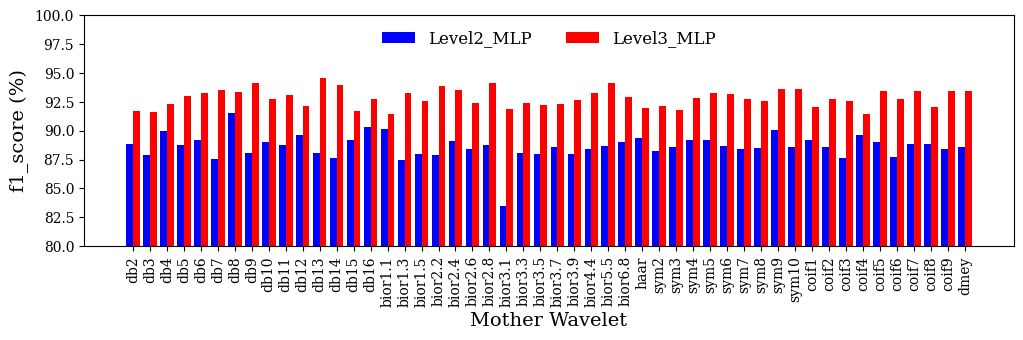

In [ ]:
#BAR plot
#import matplotlib.pyplot as plt

X = df1['wavelet']
Y = df1.drop(['wavelet'], axis = 1)
Y.iloc[:, :] *= 100

# Data
L2 = Y['L2MLP_F_T']
L3 = Y['L3MLP_F_T']
# L4 = Y['L3MLP_F_T']

barWidth = 0.4

# Create bar plot
# Set the position of the bars on the x-axis
r1 = np.arange(len(L2))
r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]

x_pos = [i for i, _ in enumerate(X)]
# set figure size
plt.figure(figsize=(12, 3))
plt.rc('font', family='serif ')
plt.bar(r1, L2, color='blue', width=barWidth, align='edge', label='Level2_MLP')
plt.bar(r2, L3, color='red', width=barWidth, align='edge', label='Level3_MLP')
# plt.bar(r3, L4, color='green', width=barWidth, align='edge', label='L4')

#set limit
plt.ylim(80,100)

# set label
plt.xlabel('Mother Wavelet', fontsize=14)
plt.ylabel('f1_score (%)', fontsize=14)

# TITLE
# plt.title("Comparison of L2and L3")
plt.xticks([r + barWidth for r in range(len(L2))], X, rotation=90)

# .set_xticklabels(X, rotation=90)
# plt.legend()
plt.legend(fontsize=12,loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, frameon=False)
# Show the plot
plt.show()



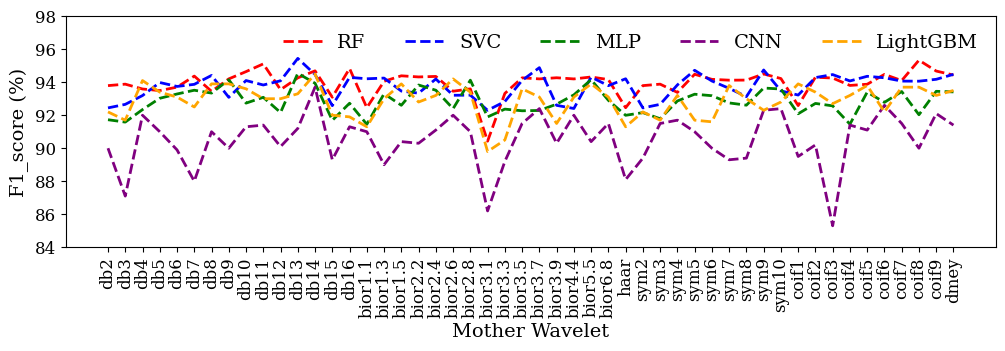

In [48]:
from matplotlib.lines import Line2D
colors = ['red','blue','green','Purple','orange']
line = ['--','--','--','--','--']
# define custom legend lines with correct line styles
legend_lines = [Line2D([0], [0], linestyle=line, color=color, linewidth=2) for line, color in zip(line, colors)]

# Use your new font on all your plots.
plt.rc('font', family='serif ')

#ploting dataframe of f1score
X = df1['wavelet']
Y = df1.drop(['wavelet'], axis = 1)
Y.iloc[:, :] *= 100
coly = Y.columns

#ploting-----------------------------------------------------------------------
k = Y[['L3RF_F_T','L3SVC_F_T','L3MLP_F_T','L3CNN_F_T','L3GBM_F_T']]
kcol = k.columns
le = ['RF','SVC','MLP','CNN','LightGBM']

plt.figure(figsize=(12,3))

for i, col in enumerate(kcol):
  plt.plot(X, k[col],linestyle = line[i] ,linewidth = 2, color=colors[i])

  # max_idx = k[col].idxmax()
  # plt.scatter(X[max_idx], k[col][max_idx], color= 'black', marker='^', s=50, zorder = 3)

# add a legend using the column names
# set the position of the legend at the top and outside the plot area
plt.legend(legend_lines,le,fontsize=14,loc='upper right', ncol=5, frameon=False)


# add axis labels and a title
plt.xlabel('Mother Wavelet',fontsize=14)
plt.ylabel('F1_score (%)',fontsize=14)
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(84,98)
# plt.title('Line plot of y against x')

# show the plot
plt.show()

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load the data into a pandas dataframe
# df =  df1[['L3RF_F_T','L3SVC_F_T','L3MLP_F_T', 'wavelet']]

# # Set the 'wavelet' column as the index
# df.set_index('wavelet', inplace=True)

# plt.figure(figsize=(8, 10))
# # Create the heatmap
# sns.heatmap(df, cmap='coolwarm')

# # Set the title and axis labels
# plt.title('Performance Comparison of ML Models with Different Wavelets')
# plt.xlabel('ML Models')
# plt.ylabel('Wavelets')

# # Show the plot
# plt.show()


In [ ]:
# # ploting subplot of L2 and L3 with and without feature reduction and without tuning

# import matplotlib.pyplot as plt
# from matplotlib.lines import Line2D

# X = df1['wavelet']
# Y = df1.drop(['wavelet'], axis = 1)
# Y.iloc[:, :] *= 100
# # coly = Y.columns

# #ploting-----------------------------------------------------------------------
# l3 = Y[['L3RF_f1_WT','L3SVC_f1_WT','L3MLP_f1_WT','L3RF_WF_WT','L3SVC_WF_WT','L3MLP_WF_WT']]
# l2 = Y[['L2RF_f1_WT','L2SVC_f1_WT','L2MLP_f1_WT','L2RF_WF_WT','L2SVC_WF_WT','L2MLP_WF_WT']]
# l2l3 = Y[['L2RF_f1_WT','L2SVC_f1_WT','L2MLP_f1_WT','L3RF_f1_WT','L3SVC_f1_WT','L3MLP_f1_WT']]

# l3col = l3.columns
# l2col = l2.columns
# l2l3col = l2l3.columns

# #linestyle and color
# line = ['--','--','--',':',':',':']
# colors = ['red', 'blue','green','red', 'blue','green']

# # define custom legend lines with correct line styles
# legend_lines = [Line2D([0], [0], linestyle=line, color=color, linewidth=2) for line, color in zip(line, colors)]

# # Create a figure with 3 subplots arranged vertically
# fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(13, 15))
# plt.rc('font', family='serif ')

# for i, col in enumerate(l2col):
#   axs[0].plot(X, l2[col],linestyle = line[i] ,linewidth = 2, color=colors[i])

# l2col = ['RF (F)', 'SVC (F)', 'MLP (F)', 'RF (WF)', 'SVC (WF)', 'MLP (WF)']
# axs[0].legend(legend_lines,l2col,fontsize=12,loc='upper center', bbox_to_anchor=(0.5, 1), ncol=6, frameon=False)

# for i, col in enumerate(l3col):
#   axs[1].plot(X, l3[col],linestyle = line[i] ,linewidth = 2, color=colors[i])
# l3col = ['RF (F)', 'SVC (F)', 'MLP (F)', 'RF (WF)', 'SVC (WF)', 'MLP (WF)']
# axs[1].legend(legend_lines,l3col,fontsize=12,loc='upper center', bbox_to_anchor=(0.5, 1), ncol=6, frameon=False)

# for i, col in enumerate(l2l3col):
#   axs[2].plot(X, l2l3[col],linestyle = line[i] ,linewidth = 2, color=colors[i])

# l2l3col = ['L2RF (F)', 'L2SVC (F)', 'L2MLP (F)', 'L3RF (F)', 'L3SVC (F)', 'L3MLP (F)']
# axs[2].legend(legend_lines,l2l3col,fontsize=12,loc='upper center', bbox_to_anchor=(0.5, 1), ncol=6, frameon=False)


# # set the axis limit
# axs[0].set_ylim(75,98)
# axs[1].set_ylim(83,98)
# axs[2].set_ylim(80,100)

# # set label
# axs[0].set_xlabel('Mother Wavelet', fontsize=14)
# axs[0].set_ylabel('f1_score (%)', fontsize=14)
# axs[1].set_xlabel('Mother Wavelet', fontsize=14)
# axs[1].set_ylabel('f1_score (%)', fontsize=14)
# axs[2].set_xlabel('Mother Wavelet', fontsize=14)
# axs[2].set_ylabel('f1_score (%)', fontsize=14)

# # set font size of tick labels
# axs[0].tick_params(axis='both', labelsize=12)
# axs[0].set_xticklabels(X, rotation=90)
# axs[1].tick_params(axis='both', labelsize=12)
# axs[1].set_xticklabels(X, rotation=90)
# axs[2].tick_params(axis='both', labelsize=12)
# axs[2].set_xticklabels(X, rotation=90)

# # remove grid lines from subplot
# axs[0].grid(False)
# axs[1].grid(False)
# axs[2].grid(False)

# # Set the overall title of the figure
# #fig.suptitle('Three subplots', fontsize=16)

# # Adjust the spacing between subplots
# plt.subplots_adjust(hspace=0.5)

# # Show the plot
# plt.show()

# # Save the plot in TIFF format with a resolution of 300 pixels and transparent background
# # plt.savefig('plotsample.tiff', dpi=300, format='tiff', transparent=True)

# plt.clf()

In [49]:
df1.head()

,L2RF_F_T,L2SVC_F_T,L2MLP_F_T,L2GBM_F_T,L2CNN_F_T,L3RF_F_T,L3SVC_F_T,L3MLP_F_T,L3GBM_F_T,L3CNN_F_T,wavelet
0,0.900215,0.908316,0.888111,0.888,0.819,0.937943,0.924432,0.917269,0.922,0.900,db2
1,0.890681,0.901593,0.878704,0.884,0.845,0.938828,0.926585,0.915831,0.917,0.871,db3
2,0.907904,0.896668,0.899804,0.887,0.814,0.935895,0.931922,0.923414,0.941,0.920,db4
3,0.895111,0.904956,0.887439,0.877,0.808,0.934928,0.939828,0.930261,0.934,0.910,db5
4,0.900516,0.909663,0.892128,0.903,0.835,0.937027,0.937442,0.932866,0.931,0.899,db6


<ipython-input-55-cbc4d75539c7>:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(X, rotation=90)
<ipython-input-55-cbc4d75539c7>:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(X, rotation=90)
<ipython-input-55-cbc4d75539c7>:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(X, rotation=90)
<ipython-input-55-cbc4d75539c7>:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[3].set_xticklabels(X, rotation=90)
<ipython-input-55-cbc4d75539c7>:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[4].set_xticklabels(X, rotation=90)


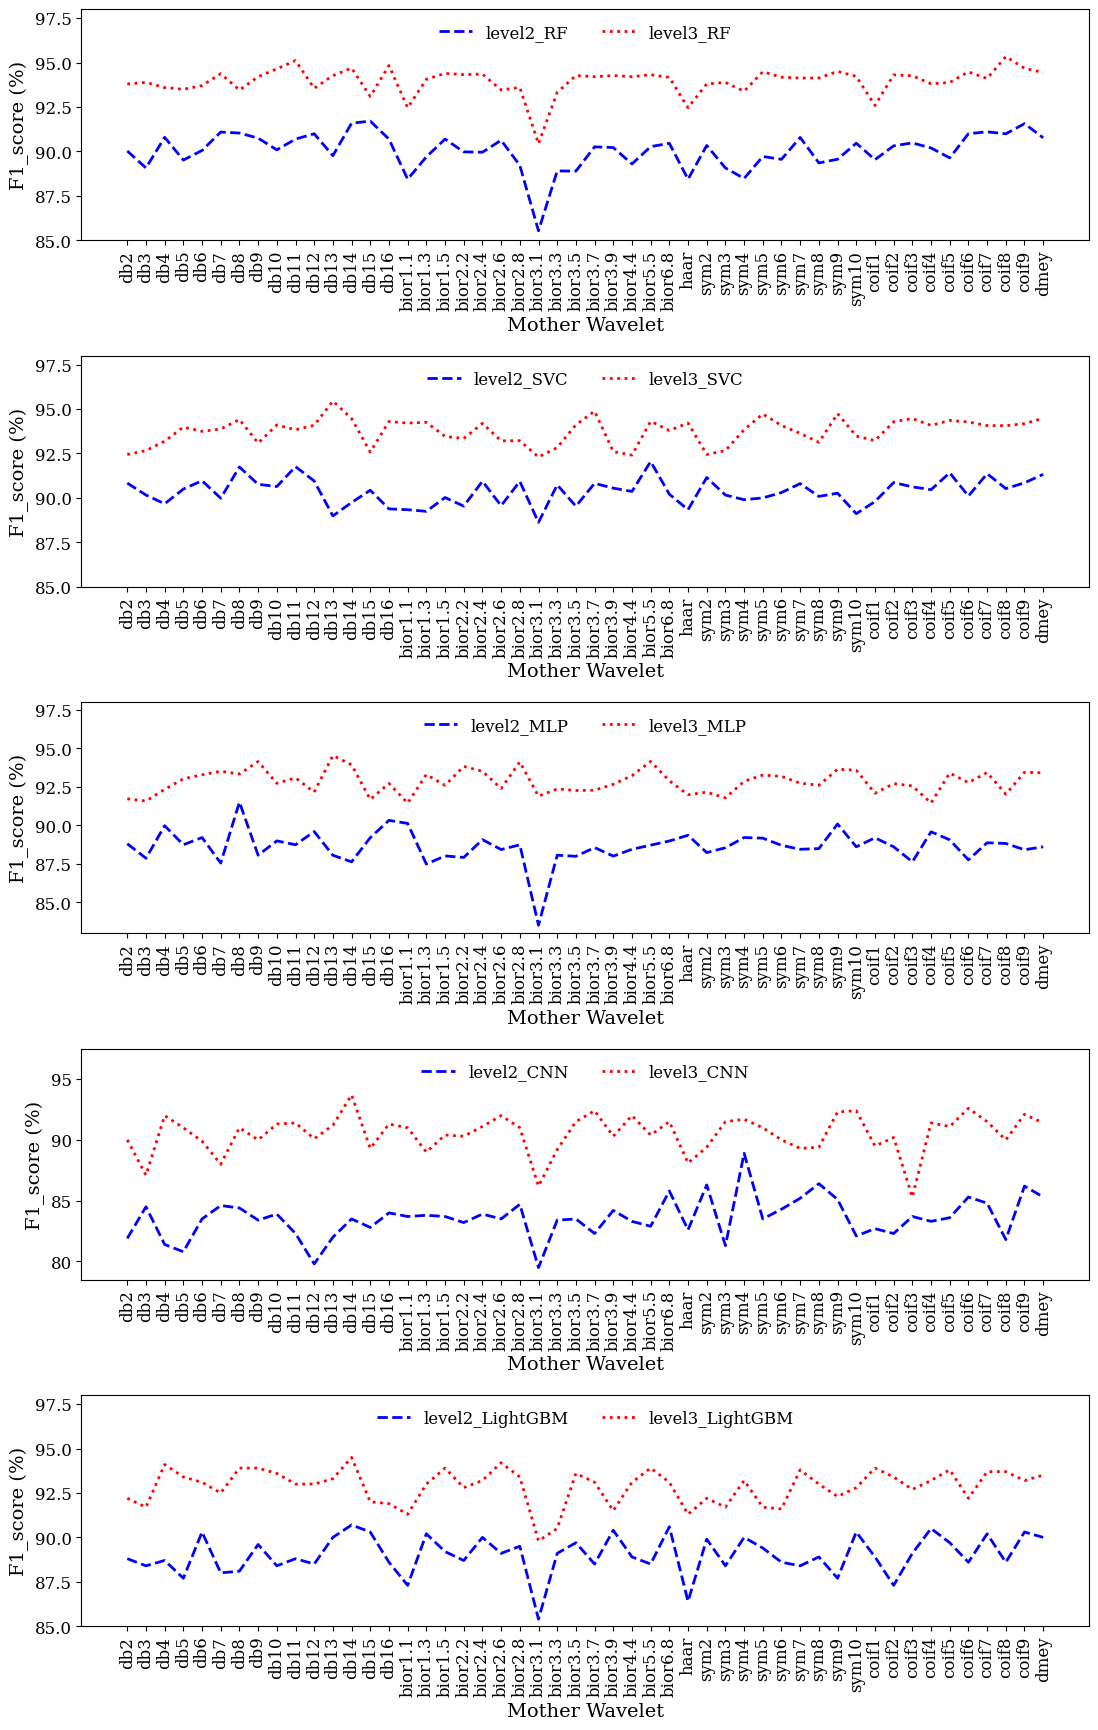

<Figure size 640x480 with 0 Axes>

In [55]:
# ploting subplot of L2 and L3 with feature reduction and tuning

# This is done to select the level, mother wavelet and model

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

X = df1['wavelet']
Y = df1.drop(['wavelet'], axis = 1)
Y.iloc[:, :] *= 100
# coly = Y.columns

#ploting-----------------------------------------------------------------------
l2l3rf = Y[['L2RF_F_T','L3RF_F_T'	]]
l2l3svc = Y[['L2SVC_F_T','L3SVC_F_T']]
l2l3mlp = Y[['L2MLP_F_T','L3MLP_F_T']]
l2l3cnn = Y[['L2CNN_F_T','L3CNN_F_T']]
l2l3lgbm = Y[['L2GBM_F_T','L3GBM_F_T']]

l2l3rfcol = l2l3rf.columns
l2l3svccol = l2l3svc.columns
l2l3mlpcol = l2l3mlp.columns
l2l3cnncol = l2l3cnn.columns
l2l3lgbmcol = l2l3lgbm.columns

#linestyle and color
line = ['--',':']
colors = ['blue', 'red']

# define custom legend lines with correct line styles
legend_lines = [Line2D([0], [0], linestyle=line, color=color, linewidth=2) for line, color in zip(line, colors)]

# Create a figure with 3 subplots arranged vertically
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(13, 21))
plt.rc('font', family='serif ')

for i, col in enumerate(l2l3rfcol):
  axs[0].plot(X, l2l3rf[col],linestyle = line[i] ,linewidth = 2, color=colors[i])

l2l3rfcol = ['level2_RF','level3_RF']
axs[0].legend(legend_lines,l2l3rfcol,fontsize=12,loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)

for i, col in enumerate(l2l3svccol):
  axs[1].plot(X, l2l3svc[col],linestyle = line[i] ,linewidth = 2, color=colors[i])
l2l3svccol = ['level2_SVC','level3_SVC']
axs[1].legend(legend_lines,l2l3svccol,fontsize=12,loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)

for i, col in enumerate(l2l3mlpcol):
  axs[2].plot(X, l2l3mlp[col],linestyle = line[i] ,linewidth = 2, color=colors[i])

l2l3mlpcol = ['level2_MLP','level3_MLP']
axs[2].legend(legend_lines,l2l3mlpcol,fontsize=12,loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)

for i, col in enumerate(l2l3cnncol):
  axs[3].plot(X, l2l3cnn[col],linestyle = line[i] ,linewidth = 2, color=colors[i])

l2l3cnncol = ['level2_CNN','level3_CNN']
axs[3].legend(legend_lines,l2l3cnncol,fontsize=12,loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)

for i, col in enumerate(l2l3lgbmcol):
  axs[4].plot(X, l2l3lgbm[col],linestyle = line[i] ,linewidth = 2, color=colors[i])

l2l3lgbmcol = ['level2_LightGBM','level3_LightGBM']
axs[4].legend(legend_lines,l2l3lgbmcol,fontsize=12,loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)


# set the axis limit
axs[0].set_ylim(85,98)
axs[1].set_ylim(85,98)
axs[2].set_ylim(83,98)
axs[3].set_ylim(78.5,97.5)
axs[4].set_ylim(85,98)

# set label
axs[0].set_xlabel('Mother Wavelet', fontsize=14)
axs[0].set_ylabel('F1_score (%)', fontsize=14)
axs[1].set_xlabel('Mother Wavelet', fontsize=14)
axs[1].set_ylabel('F1_score (%)', fontsize=14)
axs[2].set_xlabel('Mother Wavelet', fontsize=14)
axs[2].set_ylabel('F1_score (%)', fontsize=14)
axs[3].set_xlabel('Mother Wavelet', fontsize=14)
axs[3].set_ylabel('F1_score (%)', fontsize=14)
axs[4].set_xlabel('Mother Wavelet', fontsize=14)
axs[4].set_ylabel('F1_score (%)', fontsize=14)

# set font size of tick labels
axs[0].tick_params(axis='both', labelsize=12)
axs[0].set_xticklabels(X, rotation=90)
axs[1].tick_params(axis='both', labelsize=12)
axs[1].set_xticklabels(X, rotation=90)
axs[2].tick_params(axis='both', labelsize=12)
axs[2].set_xticklabels(X, rotation=90)
axs[3].tick_params(axis='both', labelsize=12)
axs[3].set_xticklabels(X, rotation=90)
axs[4].tick_params(axis='both', labelsize=12)
axs[4].set_xticklabels(X, rotation=90)

# remove grid lines from subplot
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)
axs[3].grid(False)
axs[4].grid(False)

# Set the overall title of the figure
#fig.suptitle('Three subplots', fontsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

# Save the plot in TIFF format with a resolution of 300 pixels and transparent background
# plt.savefig('plotsample.tiff', dpi=300, format='tiff', transparent=True)

plt.clf()

# Selecting the mother wavelet for model tuning
### *The idea is to first find the mean of all L3 ML models (RF, SVC and MLP) then take the mother wavelets from each model which are above mean and then take the commmon wavelets from all three models*

In [ ]:
df1

In [ ]:
df2 = df1[['wavelet','L3RF_F_T','L3SVC_F_T','L3MLP_F_T']]

In [ ]:
df2.describe()

,L3RF_F_T,L3SVC_F_T,L3MLP_F_T
count,50.000000,50.000000,50.000000
mean,0.939490,0.937536,0.928406
std,0.007816,0.007438,0.007731
min,0.904279,0.922987,0.914495
25%,0.936239,0.932112,0.922737
50%,0.941678,0.940230,0.927626
75%,0.943437,0.942647,0.934099
max,0.953348,0.954445,0.945394


In [ ]:
# Finding the wavelet which are above the mean of f1_score of each ML model and then the common wavelet in all model
models = ['RF', 'SVC', 'MLP']
mean_F_T = [df2[f'L3{model}_F_T'].max() for model in models]

for i, model in enumerate(models):
    filtered_df = df2[df2[f'L3{model}_F_T'] == mean_F_T[i]]
    wavelets = filtered_df['wavelet'].tolist()

    if model == 'RF':
        RF_wavelet = wavelets
    elif model == 'SVC':
        SVC_wavelet = wavelets
    elif model == 'MLP':
        MLP_wavelet = wavelets

common_wavelets = set(RF_wavelet) & set(SVC_wavelet) & set(MLP_wavelet)
common_wavelets_list = list(common_wavelets)


In [ ]:
MLP_wavelet

['db13']

In [ ]:
# Finding the values of f1_score of all selected wavelet of all ML models
wavelets = ['bior3.5', 'db11', 'dmey', 'bior2.4', 'db7', 'db8', 'coif5', 'bior1.3', 'db13', 'db12', 'coif8', 'bior2.8']

# filter the dataframe based on the wavelets list
filtered_data = df2[df2['wavelet'].isin(wavelets)]

# get the values of each column for the filtered data
L3RF_f1_WT_values = filtered_data['L3RF_f1_WT'].tolist()
L3SVC_f1_WT_values = filtered_data['L3SVC_f1_WT'].tolist()
L3MLP_f1_WT_values = filtered_data['L3MLP_f1_WT'].tolist()




# Feature selection_PCA and Model_SVC

In [ ]:
w_T_p_svc_score = []
w_V_p_svc_score = []

# loop over each wavelet
for w in wavelets:

  # Subset the data for the current wavelet
  new = df[df['wavelet'] == w]
  X = new.drop(['Date', 'Machine', 'Operation', 'Condition', 'Repeat', 'operationcondition', 'wavelet'], axis=1)
  y = new['operationcondition']
  print (w)

  # Split data into train, validation, and test sets
  X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


  # Define pipeline with PCA and random forest classifier
  pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('pca', PCA(n_components=0.95)),
      ('classifier', SVC(kernel='rbf',C=9,gamma='auto'))
  ])

  # # Define parameter grid for hyperparameter tuning
  # param_grid = {
  #     'pca__n_components': [0.95],
  #     'rf__n_estimators': [100, 200, 500],
  #     'rf__max_depth': [10, 30, None],
  #     'rf__min_samples_split': [2, 5],
  #     'rf__min_samples_leaf': [1],
  #     'rf__max_features': ['sqrt', 'log2']
  # }

  # Perform grid search for hyperparameter tuning
  # grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='f1_macro')
  pipeline.fit(X_train, y_train)

  # # Print best hyperparameters and corresponding F1 score
  # print("Best hyperparameters:", grid.best_params_)
  # print("Training F1 score:", grid.best_score_)

  # Evaluate model on validation set
  y_pred_val = pipeline.predict(X_val)
  f1_val = f1_score(y_val, y_pred_val, average='macro')
  print("Validation F1 score:", f1_val)

  # Evaluate model on test set
  y_pred_test = pipeline.predict(X_test)
  f1_test = f1_score(y_test, y_pred_test, average='macro')
  print("Test F1 score:", f1_test)

  w_T_p_svc_score.append(f1_test)
  w_V_p_svc_score.append(f1_val)



# Feature selection_PCA and Model_RF

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import IncrementalPCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [ ]:
w_T_score = []
w_V_score = []
# loop over each wavelet
for w in wavelets:

  # Subset the data for the current wavelet
  new = df[df['wavelet'] == w]
  X = new.drop(['Date', 'Machine', 'Operation', 'Condition', 'Repeat', 'operationcondition', 'wavelet'], axis=1)
  y = new['operationcondition']
  print (w)

  # Split data into train, validation, and test sets
  X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


  # Define pipeline with PCA and random forest classifier
  pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('pca', PCA(n_components=0.95)),
      ('rf', RandomForestClassifier(bootstrap = True, max_depth= 30,min_samples_leaf=1, min_samples_split= 5, n_estimators= 200, random_state = 42, verbose=0))
  ])

  # # Define parameter grid for hyperparameter tuning
  # param_grid = {
  #     'pca__n_components': [0.95],
  #     'rf__n_estimators': [100, 200, 500],
  #     'rf__max_depth': [10, 30, None],
  #     'rf__min_samples_split': [2, 5],
  #     'rf__min_samples_leaf': [1],
  #     'rf__max_features': ['sqrt', 'log2']
  # }

  # Perform grid search for hyperparameter tuning
  # grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='f1_macro')
  pipeline.fit(X_train, y_train)

  # # Print best hyperparameters and corresponding F1 score
  # print("Best hyperparameters:", grid.best_params_)
  # print("Training F1 score:", grid.best_score_)

  # Evaluate model on validation set
  y_pred_val = pipeline.predict(X_val)
  f1_val = f1_score(y_val, y_pred_val, average='macro')
  # print("Validation F1 score:", f1_val)

  # Evaluate model on test set
  y_pred_test = pipeline.predict(X_test)
  f1_test = f1_score(y_test, y_pred_test, average='macro')
  # print("Test F1 score:", f1_test)

  w_T_score.append(f1_test)
  w_V_score.append(f1_val)



In [ ]:
# for plotting varaiance plot to check the PCSbased on 0.95 threshold


for w in wavelets:
    # Subset the data for the current wavelet
    wavelet_data = df[df['wavelet'] == w].drop(['Date', 'Machine', 'Operation', 'Condition', 'Repeat', 'operationcondition', 'wavelet'], axis=1)

    # Calculate the explained variance ratios for each component
    x = StandardScaler().fit_transform(wavelet_data)
    pca = IncrementalPCA()  #n_components=20
    principalComponents = pca.fit_transform(x)
    # principalDf = pd.DataFrame(data = principalComponents)
    # Calculate variance ratios and cumulative variance
    variance_ratios = pca.explained_variance_ratio_
    cumulative_variances = np.cumsum(variance_ratios)

    # Find the index where the cumulative variance exceeds 0.95
    cum_var_threshold_index = np.argmax(cumulative_variances >= 0.95)

    # Plot individual variance as a bar
    fig, ax1 = plt.subplots()
    ax1.bar(range(len(variance_ratios)), variance_ratios)
    ax1.set_ylabel('Individual Variance')

    # Plot cumulative variance as a line
    ax2 = ax1.twinx()
    ax2.plot(range(len(cumulative_variances)), cumulative_variances, '--', color='red')
    ax2.axhline(y=0.95, color='green', linestyle='--')  # add horizontal line at 0.95
    ax2.set_ylabel('Cumulative Variance', color='red')
    ax2.axvline(x=cum_var_threshold_index, color='green', linestyle='--')
    for tl in ax2.get_yticklabels():
        tl.set_color('red')

    plt.title(f'Variance Explained by Principal Components for {w} wavelet')
    plt.xlabel('Principal Components')
    plt.show()


# Hyperparameter tuning for Random forest, SVC and MLP

In [ ]:
# HYPARAMETER TUNING OF RF

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import f1_score


score_rf = []

#Define the parameter grid for RF
rf_param_grid = {
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5]}





# w = 'db11'  # MLP
w = 'coif8' #RF


# Subset the data for the current wavelet
new = df[df['wavelet'] == w]
print (new.shape)
X = new.drop(['Date', 'Machine', 'Operation', 'Condition', 'Repeat', 'operationcondition', 'wavelet'], axis=1)
y = new['operationcondition']
print (w)

# Split the data into training, validation, and test sets
#X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create for feature selection
f_selection = RandomForestClassifier(random_state = 42, verbose=0)

# Perform feature selection using SelectFromModel
feature_selector = SelectFromModel(f_selection)
feature_selector.fit(X_train, y_train)
X_train_transformed = feature_selector.transform(X_train)

print (X_train_transformed.shape)


# Create a GridSearchCV object for random forest
grid_search = GridSearchCV(f_selection, param_grid, cv=5, n_jobs=-1, verbose=1,
                           scoring='f1_macro', return_train_score=True)
# Fit the GridSearchCV object on the transformed training data
grid_search.fit(X_train_transformed, y_train)

# Print the best hyperparameters
print(f'Best hyperparameters for {w}: {grid_search.best_params_}')

# Evaluate the pipeline on the test set
X_test_transformed = feature_selector.transform(X_test)
y_test_pred = grid_search.predict(X_test_transformed)
f1_test = f1_score(y_test, y_test_pred,average='macro')
print(f'F1 score on test set for {w}: {f1_test}')
score_rf.append(f1_test)

In [ ]:
# HYPARAMETER TUNING OF SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import f1_score
score_SVC = []

svc_param_grid = {'classification__C': [0.1, 1, 10, 100, 1000],
              'classification__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'classification__kernel': ['linear', 'rbf']}


w = 'dmey' #SVC

# Subset the data for the current wavelet
new = df[df['wavelet'] == w]
print (new.shape)
X = new.drop(['Date', 'Machine', 'Operation', 'Condition', 'Repeat', 'operationcondition', 'wavelet'], axis=1)
y = new['operationcondition']
print (w)

# Split the data into training, validation, and test sets
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create for feature selection
f_selection = RandomForestClassifier(random_state = 42, verbose=0)

# Perform feature selection using SelectFromModel
feature_selector = SelectFromModel(f_selection)
feature_selector.fit(X_train, y_train)
X_train_transformed = feature_selector.transform(X_train)
# X_val_transformed = feature_selector.transform(X_val)
X_test_transformed = feature_selector.transform(X_test)

print (X_train_transformed.shape)

# creating pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('classification', SVC())])

# Create a GridSearchCV object for random forest
grid_search = GridSearchCV(pipe, svc_param_grid, cv=5, n_jobs=-1, verbose=0,
                           scoring='f1_macro', return_train_score=True)
# Fit the GridSearchCV object on the transformed training data
pipe.fit(X_train_transformed, y_train)

# Print the best hyperparameters
# print(f'Best hyperparameters for {w}: {grid_search.best_params_}')

# # Evaluate the pipeline on the validation set
# y_val_pred = grid_search.predict(X_val_transformed)
# f1_val = f1_score(y_val, y_val_pred, average='macro')
# print(f'F1 score on validation set for {w}: {f1_val}')


# Evaluate the pipeline on the test set
y_test_pred = pipe.predict(X_test_transformed)
f1_test = f1_score(y_test, y_test_pred,average='macro')
print(f'F1 score on test set for {w}: {f1_test}')

score_SVC.append(f1_test)

(2077, 175)
dmey
(1453, 50)
F1 score on test set for dmey: 0.9212951913566556


# Evaluation of models

In [ ]:
path122 = '/content/drive/MyDrive/confusion data.csv'
df122 = pd.read_csv(path122,sep=',')

In [ ]:
df122.head()

,class,PRF,SRF,ACCRF,F1RF,PSVC,RSVC,ACCSVC,F1SVC,PMLP,SMLP,ACCMLP,F1MLP
0,OP01bad,0.98,0.98,0.996,0.98,0.97,1.00,0.996,0.98,0.980,0.970,0.995,0.98
1,OP01good,0.98,0.96,0.995,0.97,0.96,0.91,0.988,0.93,0.905,0.905,0.984,0.91
2,OP02bad,1.00,0.98,0.998,0.99,1.00,0.98,0.998,0.99,0.998,1.000,0.998,0.99
3,OP02good,0.98,0.97,0.995,0.98,1.00,0.97,0.996,0.98,0.970,0.980,0.995,0.98
4,OP04bad,0.95,0.92,0.987,0.93,0.93,0.88,0.982,0.91,0.930,0.930,0.987,0.93


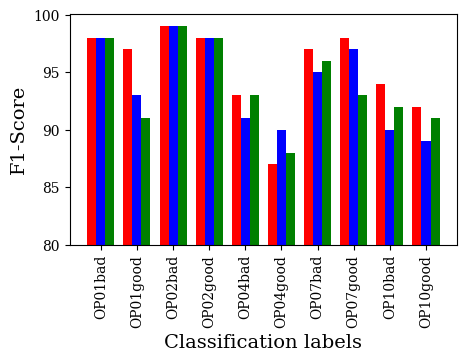

In [ ]:
c = df122['class']
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(5, 3))

# Set the positions of the bars
x = np.arange(len(c))
barwidth = 0.25

plt.rc('font', family='serif ')

# Plot the bar chart
plt.bar(x - barwidth, df122['F1RF']*100, color='red',width = barwidth, align='center', label ='RF')
plt.bar(x, df122['F1SVC']*100,color='blue', width = barwidth, align='center', label='SVC')
plt.bar(x + barwidth, df122['F1MLP']*100,color='green',width = barwidth, align='center', label='MLP')

# Add labels and title
plt.xlabel('Classification labels', fontsize=14)
plt.ylabel('F1-Score', fontsize=14)
# plt.title('PRF, PSVC, and PMLP Scores for each Class')

# Add a legend
# plt.legend(fontsize=12,loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, frameon=False)

# Rotate the x-axis labels for better readability
plt.xticks(x, c, rotation=90)

#set limit
plt.ylim(80,100.1)

# Show the plot
plt.show()


